# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     G:\Users\Saru\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv('token.env')

Python-dotenv could not parse statement starting at line 2
Python-dotenv could not parse statement starting at line 4


True

In [3]:
# Create a newsapi client
from newsapi.newsapi_client import NewsApiClient
newsapi = NewsApiClient(api_key=os.environ['NEWS_API_KEY'])

In [4]:
# Fetch the Bitcoin news articles
## \12-NLP\2\04-Stu_Crisis_Voice\Solved\voice_crisis.ipynb
btc_headlines = []
btc_headlines = newsapi.get_everything(
    q='bitcoin OR btc',
    language='en',
    sort_by='relevancy',
    page=1
)

btc_headlines

{'status': 'ok',
 'totalResults': 8447,
 'articles': [{'source': {'id': None, 'name': 'Blogspot.com'},
   'author': 'noreply@blogger.com (Unknown)',
   'title': 'BTC, DOGE, and SHIBA Price Analysis for October 6',
   'description': 'How high are the chances of Bitcoin sustaining its gains and pushing altcoins higher?   from U.Today https://ift.tt/3BkD5px https://ift.tt/e...',
   'url': 'https://techncruncher.blogspot.com/2021/10/btc-doge-and-shiba-price-analysis-for.html',
   'urlToImage': None,
   'publishedAt': '2021-10-06T19:49:00Z',
   'content': 'How high are the chances of Bitcoin sustaining its gains and pushing altcoins higher?from U.Today https://ift.tt/3BkD5px https://ift.tt/eA8V8J'},
  {'source': {'id': None, 'name': 'Blogspot.com'},
   'author': 'noreply@blogger.com (Unknown)',
   'title': 'Who Bought $1.6B in Bitcoin Wednesday, and Why?',
   'description': 'last week the cryptocurrency market persistently asked the gnawing and annoying question, “Why?”\r\nSpecifically, why

In [5]:
## Print total articles
print(f'Total articles about Bitcoin: {btc_headlines["totalResults"]}')

## Show sample article
btc_headlines['articles'][0]

Total articles about Bitcoin: 8447


{'source': {'id': None, 'name': 'Blogspot.com'},
 'author': 'noreply@blogger.com (Unknown)',
 'title': 'BTC, DOGE, and SHIBA Price Analysis for October 6',
 'description': 'How high are the chances of Bitcoin sustaining its gains and pushing altcoins higher?   from U.Today https://ift.tt/3BkD5px https://ift.tt/e...',
 'url': 'https://techncruncher.blogspot.com/2021/10/btc-doge-and-shiba-price-analysis-for.html',
 'urlToImage': None,
 'publishedAt': '2021-10-06T19:49:00Z',
 'content': 'How high are the chances of Bitcoin sustaining its gains and pushing altcoins higher?from U.Today https://ift.tt/3BkD5px https://ift.tt/eA8V8J'}

In [6]:
# Fetch the Ethereum news articles
eth_headlines = []
eth_headlines = newsapi.get_everything(
    q='ethereum OR eth',
    language='en',
)

eth_headlines

{'status': 'ok',
 'totalResults': 3299,
 'articles': [{'source': {'id': None, 'name': 'Blogspot.com'},
   'author': 'noreply@blogger.com (Unknown)',
   'title': 'Nervos launches cross-chain bridge to connect Ethereum and Cardano',
   'description': 'A new cross-chain bridge is currently connected to Ethereum through a cross-chain bridge, with Cardano and other public chains to come in the future.Nervos\xa0today announced that the Force Bridge is now live on the mainnet. The Nervos Network is a collection of…',
   'url': 'https://techncruncher.blogspot.com/2021/10/nervos-launches-cross-chain-bridge-to.html',
   'urlToImage': 'https://blogger.googleusercontent.com/img/a/AVvXsEgPPOybYbMwmsXrgektLx2gAB_TxrtYlXuFMKC9_ufbyBE23UZ7meSKtNO9FgKdDh0FZf-ugBepgc9Iooy6XQ5s4NkDthhSo2pPF-X2A3Aa2mXtZ5KSkUA4QwB7tEzJ8y79T4iN0A7XC-Ac_RdFuEhCDUuirVAvxQH4b_LUtvyto6aM_sFaDt5v39HYnQ=w1200-h630-p-k-no-nu',
   'publishedAt': '2021-10-16T18:50:00Z',
   'content': 'A new cross-chain bridge is currently connected 

In [7]:
## Print total articles
print(f'Total articles about Ethereum: {eth_headlines["totalResults"]}')

## Show sample article
eth_headlines['articles'][0]

Total articles about Ethereum: 3299


{'source': {'id': None, 'name': 'Blogspot.com'},
 'author': 'noreply@blogger.com (Unknown)',
 'title': 'Nervos launches cross-chain bridge to connect Ethereum and Cardano',
 'description': 'A new cross-chain bridge is currently connected to Ethereum through a cross-chain bridge, with Cardano and other public chains to come in the future.Nervos\xa0today announced that the Force Bridge is now live on the mainnet. The Nervos Network is a collection of…',
 'url': 'https://techncruncher.blogspot.com/2021/10/nervos-launches-cross-chain-bridge-to.html',
 'urlToImage': 'https://blogger.googleusercontent.com/img/a/AVvXsEgPPOybYbMwmsXrgektLx2gAB_TxrtYlXuFMKC9_ufbyBE23UZ7meSKtNO9FgKdDh0FZf-ugBepgc9Iooy6XQ5s4NkDthhSo2pPF-X2A3Aa2mXtZ5KSkUA4QwB7tEzJ8y79T4iN0A7XC-Ac_RdFuEhCDUuirVAvxQH4b_LUtvyto6aM_sFaDt5v39HYnQ=w1200-h630-p-k-no-nu',
 'publishedAt': '2021-10-16T18:50:00Z',
 'content': 'A new cross-chain bridge is currently connected to Ethereum through a cross-chain bridge, with Cardano and other pub

In [8]:
## \12-NLP\2\05-Ins_Vader_Sentiment\Solved\vader_sentiment.ipynb
# Create the Bitcoin sentiment scores DataFrame
## Initialize empty list
btc_sentiments = []

## for-loop parses sentiment scores from articles and appends them to btc_sentiments
for article in btc_headlines['articles']:
    ## try-except clause ends loop once an error is produced
    try:
        date = article['publishedAt'][:10]
        text = article['content']
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neg = sentiment['neg']
        neu = sentiment['neu']
        
        btc_sentiments.append({
            'date': date,
            'text': text,
            'compound': compound,
            'positive': pos,
            'negative': neg,
            'neutral': neu
        })

    except AttributeError:
        pass

## Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

## Create list of column names and add to DataFrame
cols = ['date','text','compound','positive','negative','neutral']
btc_df = btc_df[cols]

btc_df.head()

,date,text,compound,positive,negative,neutral
0,2021-10-06,How high are the chances of Bitcoin sustaining...,0.4939,0.219,0.000,0.781
1,2021-10-10,"Specifically, why did someone make a massive p...",0.5461,0.121,0.000,0.879
2,2021-10-20,Following SEC Chair Gary Gensler's landmark ap...,0.5994,0.198,0.057,0.745
3,2021-10-06,"<ul><li>Bitcoin, in terms of market value, ros...",0.3400,0.076,0.000,0.924
4,2021-10-28,Bitcoin. Sean Gladwell\r\nSean Gladwell\r\nCry...,0.4391,0.157,0.074,0.769


In [9]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_headlines['articles']:
    try:
        date = article['content']
        text = article['content']
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neg = sentiment['neg']
        neu = sentiment['neu']

        eth_sentiments.append({
            'date': date,
            'text': text,
            'compound': compound,
            'positive': pos,
            'negative': neg,
            'neutral': neu
        })
    except AttributeError:
        pass
    
eth_df = pd.DataFrame(eth_sentiments)

cols = ['date','text','compound','positive','negative','neutral']
eth_df = eth_df[cols]

eth_df.head()

,date,text,compound,positive,negative,neutral
0,A new cross-chain bridge is currently connecte...,A new cross-chain bridge is currently connecte...,0.000,0.000,0.0,1.000
1,"According to founder Vitalik Buterin, the Ethe...","According to founder Vitalik Buterin, the Ethe...",0.000,0.000,0.0,1.000
2,"The exchange rates and logos of Bitcoin (BTH),...","The exchange rates and logos of Bitcoin (BTH),...",0.000,0.000,0.0,1.000
3,Dogecoin (CCC:DOGE-USD\r\n) sure knows how to ...,Dogecoin (CCC:DOGE-USD\r\n) sure knows how to ...,0.631,0.132,0.0,0.868
4,Mark Cuban has some advice for people who are ...,Mark Cuban has some advice for people who are ...,0.000,0.000,0.0,1.000


In [10]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.00000,20.000000,20.000000
mean,0.235080,0.08155,0.028250,0.890200
std,0.311075,0.06678,0.038197,0.071432
min,-0.440400,0.00000,0.000000,0.745000
25%,0.000000,0.00000,0.000000,0.865250
50%,0.340000,0.08500,0.000000,0.893000
75%,0.481000,0.11650,0.058750,0.927750
max,0.599400,0.21900,0.116000,1.000000


In [11]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.0000,20.000000,20.000000
mean,0.282690,0.0653,0.007300,0.927450
std,0.306509,0.0743,0.018018,0.085348
min,0.000000,0.0000,0.000000,0.745000
25%,0.000000,0.0000,0.000000,0.863500
50%,0.148000,0.0305,0.000000,0.969500
75%,0.556575,0.1245,0.000000,1.000000
max,0.822500,0.2080,0.057000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Bitcoin

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
# Instantiate the lemmatizer
wnl = WordNetLemmatizer()
print(wnl)

# Create a list of stopwords
## \12-NLP\1\03-Ins_Stopwords\Solved\stopwords.ipynb
## \12-NLP\1\04-Stu_Crude_Stopwords\Solved\crude_stopwords.ipynb
sw = set(stopwords.words('english'))   ## NLTK list of stopwords

print(sw)

<WordNetLemmatizer>
{'themselves', 'that', "shan't", "shouldn't", 'in', 'this', 'while', 'some', 'ours', "haven't", 'isn', "won't", 'any', 'was', 'ourselves', 'until', 'had', 't', 'haven', 'after', 'she', 'o', "hasn't", 'under', 'weren', 'the', 'been', 'were', 'being', 'so', 'who', "mightn't", 'your', 'did', 'above', 'with', 'hasn', "needn't", 'hadn', 'no', 'll', 'and', 'against', 'he', 'hers', "you're", 'needn', 'an', 'what', 'her', 'theirs', 'myself', 'own', 'be', 'here', 're', 'him', "weren't", "isn't", 'i', 'they', 'before', 'd', 'couldn', 'doesn', "wouldn't", 'there', 'why', 'mustn', "that'll", 'out', 'whom', "should've", 'by', 'below', 'shouldn', "you've", 'or', 'off', "couldn't", 'once', 'to', "you'll", 'about', 'but', 'all', 'now', 'yourselves', "it's", "wasn't", 'yourself', 'wouldn', 'as', 'nor', 'only', 'does', 'didn', 'them', 'these', 'a', 'my', 'of', 'same', 'mightn', 'very', 'from', 'our', 'where', 'are', 'm', 'for', "doesn't", 'don', 'his', 'during', 'ma', 'down', 'how', 

In [14]:
# Expand the default stopwords list if necessary
sw_addons = {'usually','ha','ano','char','wa','bitcoin','btc','ethereum','eth','chars'}

## Combine the two sets of stopwords with union() method
sw = sw.union(sw_addons)

print(sw)

{'themselves', 'that', "shan't", "shouldn't", 'in', 'this', 'while', 'some', 'ours', "haven't", 'isn', "won't", 'any', 'wa', 'was', 'ourselves', 'until', 'had', 't', 'haven', 'after', 'she', 'o', "hasn't", 'under', 'weren', 'the', 'been', 'were', 'being', 'so', 'usually', 'who', "mightn't", 'your', 'did', 'above', 'with', 'hasn', "needn't", 'hadn', 'no', 'll', 'btc', 'and', 'against', 'he', 'hers', "you're", 'needn', 'an', 'what', 'her', 'theirs', 'myself', 'own', 'be', 'here', 're', 'him', "weren't", "isn't", 'i', 'they', 'before', 'bitcoin', 'd', 'couldn', 'doesn', "wouldn't", 'there', 'why', 'mustn', "that'll", 'out', 'whom', "should've", 'by', 'below', 'shouldn', "you've", 'or', 'off', "couldn't", 'once', 'to', "you'll", 'about', 'but', 'all', 'now', 'yourselves', "it's", "wasn't", 'yourself', 'wouldn', 'as', 'nor', 'only', 'does', 'didn', 'them', 'these', 'a', 'my', 'of', 'same', 'mightn', 'ano', 'very', 'from', 'our', 'where', 'are', 'm', 'for', "doesn't", 'don', 'his', 'during',

In [15]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile('[^a-zA-Z ]')
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    ## \12-NLP\1\06-Stu_Lemmatize\Solved\lemmatize.ipynb
    ## \12-NLP\1\05-Ins_Lemmatization\Solved\lemmatization.ipynb
    lem = [wnl.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    return tokens

## print() plugs in the last article retrieved when fetching all of the articles
print(tokenizer(text))

['ive', 'always', 'vexed', 'question', 'validate', 'startup', 'idea', 'may', 'wellworn', 'topic', 'startup', 'theory', 'still', 'consensus', 'best', 'way', 'figure']


In [16]:
# Create a new tokens column for Bitcoin
## https://stackoverflow.com/questions/33098040/how-to-use-word-tokenize-in-data-frame
# print(btc_df['text'][2], '\n')
btc_df['tokens'] = btc_df.apply(lambda row: tokenizer(row['text']), axis=1)

# print(btc_df['tokens'][2])
btc_df.head(5)

,date,text,compound,positive,negative,neutral,tokens
0,2021-10-06,How high are the chances of Bitcoin sustaining...,0.4939,0.219,0.000,0.781,"[high, chance, sustaining, gain, pushing, altc..."
1,2021-10-10,"Specifically, why did someone make a massive p...",0.5461,0.121,0.000,0.879,"[specifically, someone, make, massive, purchas..."
2,2021-10-20,Following SEC Chair Gary Gensler's landmark ap...,0.5994,0.198,0.057,0.745,"[following, sec, chair, gary, genslers, landma..."
3,2021-10-06,"<ul><li>Bitcoin, in terms of market value, ros...",0.3400,0.076,0.000,0.924,"[ullibitcoin, term, market, value, rose, lilii..."
4,2021-10-28,Bitcoin. Sean Gladwell\r\nSean Gladwell\r\nCry...,0.4391,0.157,0.074,0.769,"[sean, gladwellsean, gladwellcrypto, miner, st..."


In [17]:
# Create a new tokens column for Ethereum
# print(eth_df['text'][0], '\n')
eth_df['tokens'] = eth_df.apply(lambda row: tokenizer(row['text']), axis=1)

# print(eth_df['tokens'][0])
eth_df.head(5)

,date,text,compound,positive,negative,neutral,tokens
0,A new cross-chain bridge is currently connecte...,A new cross-chain bridge is currently connecte...,0.000,0.000,0.0,1.000,"[new, crosschain, bridge, currently, connected..."
1,"According to founder Vitalik Buterin, the Ethe...","According to founder Vitalik Buterin, the Ethe...",0.000,0.000,0.0,1.000,"[according, founder, vitalik, buterin, ethereu..."
2,"The exchange rates and logos of Bitcoin (BTH),...","The exchange rates and logos of Bitcoin (BTH),...",0.000,0.000,0.0,1.000,"[exchange, rate, logo, bth, ether, litecoin, l..."
3,Dogecoin (CCC:DOGE-USD\r\n) sure knows how to ...,Dogecoin (CCC:DOGE-USD\r\n) sure knows how to ...,0.631,0.132,0.0,0.868,"[dogecoincccdogeusd, sure, know, keep, head, w..."
4,Mark Cuban has some advice for people who are ...,Mark Cuban has some advice for people who are ...,0.000,0.000,0.0,1.000,"[mark, cuban, advice, people, new, investing, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [18]:
# \12-NLP\1\07-Ins_Ngram_Count\Solved\ngram_count.ipynb
# \12-NLP\1\08-Stu_Counter\Solved\counter.ipynb
from collections import Counter
from nltk import ngrams

In [19]:
btc_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-10-06,How high are the chances of Bitcoin sustaining...,0.4939,0.219,0.000,0.781,"[high, chance, sustaining, gain, pushing, altc..."
1,2021-10-10,"Specifically, why did someone make a massive p...",0.5461,0.121,0.000,0.879,"[specifically, someone, make, massive, purchas..."
2,2021-10-20,Following SEC Chair Gary Gensler's landmark ap...,0.5994,0.198,0.057,0.745,"[following, sec, chair, gary, genslers, landma..."
3,2021-10-06,"<ul><li>Bitcoin, in terms of market value, ros...",0.3400,0.076,0.000,0.924,"[ullibitcoin, term, market, value, rose, lilii..."
4,2021-10-28,Bitcoin. Sean Gladwell\r\nSean Gladwell\r\nCry...,0.4391,0.157,0.074,0.769,"[sean, gladwellsean, gladwellcrypto, miner, st..."


In [20]:
# Generate the Bitcoin N-grams where N=2
btc_article = btc_df['text'][2]
# print(btc_article, '\n')

btc_tokenized = tokenizer(btc_article)
# print(btc_tokenized, '\n')

btc_bigram_counts = Counter(ngrams(btc_tokenized, n=2))
btc_bigram_counts

Counter({('following', 'sec'): 1,
         ('sec', 'chair'): 1,
         ('chair', 'gary'): 1,
         ('gary', 'genslers'): 1,
         ('genslers', 'landmark'): 1,
         ('landmark', 'approval'): 1,
         ('approval', 'first'): 1,
         ('first', 'bitcoinlinked'): 1,
         ('bitcoinlinked', 'exchangetraded'): 1,
         ('exchangetraded', 'fund'): 1,
         ('fund', 'etf'): 1,
         ('etf', 'debuted'): 1,
         ('debuted', 'nyse'): 1,
         ('nyse', 'week'): 1,
         ('week', 'driving'): 1,
         ('driving', 'controversial'): 1,
         ('controversial', 'digital'): 1,
         ('digital', 'asset'): 1,
         ('asset', 'record'): 1,
         ('record', 'high'): 1})

In [21]:
eth_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,A new cross-chain bridge is currently connecte...,A new cross-chain bridge is currently connecte...,0.000,0.000,0.0,1.000,"[new, crosschain, bridge, currently, connected..."
1,"According to founder Vitalik Buterin, the Ethe...","According to founder Vitalik Buterin, the Ethe...",0.000,0.000,0.0,1.000,"[according, founder, vitalik, buterin, ethereu..."
2,"The exchange rates and logos of Bitcoin (BTH),...","The exchange rates and logos of Bitcoin (BTH),...",0.000,0.000,0.0,1.000,"[exchange, rate, logo, bth, ether, litecoin, l..."
3,Dogecoin (CCC:DOGE-USD\r\n) sure knows how to ...,Dogecoin (CCC:DOGE-USD\r\n) sure knows how to ...,0.631,0.132,0.0,0.868,"[dogecoincccdogeusd, sure, know, keep, head, w..."
4,Mark Cuban has some advice for people who are ...,Mark Cuban has some advice for people who are ...,0.000,0.000,0.0,1.000,"[mark, cuban, advice, people, new, investing, ..."


In [22]:
# Generate the Ethereum N-grams where N=2
eth_article = eth_df['text'].iloc[2]
print(eth_article, '\n')

eth_tokenized = tokenizer(eth_article)
print(eth_tokenized, '\n')

eth_bigram_counts = Counter(ngrams(eth_tokenized, n=2))
eth_bigram_counts

The exchange rates and logos of Bitcoin (BTH), Ether (ETH), Litecoin (LTC) and Monero (XMR) are seen on the display of a cryptocurrency ATM of blockchain payment service provider Bity at the House of… [+1120 chars] 

['exchange', 'rate', 'logo', 'bth', 'ether', 'litecoin', 'ltc', 'monero', 'xmr', 'seen', 'display', 'cryptocurrency', 'atm', 'blockchain', 'payment', 'service', 'provider', 'bity', 'house'] 



Counter({('exchange', 'rate'): 1,
         ('rate', 'logo'): 1,
         ('logo', 'bth'): 1,
         ('bth', 'ether'): 1,
         ('ether', 'litecoin'): 1,
         ('litecoin', 'ltc'): 1,
         ('ltc', 'monero'): 1,
         ('monero', 'xmr'): 1,
         ('xmr', 'seen'): 1,
         ('seen', 'display'): 1,
         ('display', 'cryptocurrency'): 1,
         ('cryptocurrency', 'atm'): 1,
         ('atm', 'blockchain'): 1,
         ('blockchain', 'payment'): 1,
         ('payment', 'service'): 1,
         ('service', 'provider'): 1,
         ('provider', 'bity'): 1,
         ('bity', 'house'): 1})

In [23]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [24]:
## Retrieving 'content' ('text') data from newsapi articles produced only a few lines
## Combined all articles into one big string to give WordCloud a larger dataset to work with
# btc_big_string = ' '.join(btc_df['text'])
# print(btc_big_string)

In [25]:
## Tokenized the combined string
# btc_big_string_tokenized = tokenizer(btc_big_string)
# print(len(btc_big_string_tokenized))
# print(btc_big_string_tokenized[:10])

In [26]:
# Use token_count to get the top 10 words for Bitcoin
## Top 10 words from selected Bitcoin article
btc_bigstr = []
for tokens in btc_df.tokens:
    btc_bigstr += tokens
# btc_tokenized_count = pd.DataFrame(token_count(btc_tokenized, 10), columns=['word','count'])
btc_token_count = token_count(btc_bigstr)

btc_token_count

[('etf', 8),
 ('first', 7),
 ('price', 5),
 ('may', 4),
 ('week', 4),
 ('us', 4),
 ('exchangetraded', 3),
 ('fund', 3),
 ('cryptocurrency', 3),
 ('day', 3)]

In [27]:
## Top 10 words from all Bitcoin articles
# btc_big_string_count = pd.DataFrame(token_count(btc_big_string_tokenized, 10), columns=['word','count'])

# btc_big_string_count

In [28]:
# Use token_count to get the top 10 words for Ethereum
eth_bigstr = []
for tokens in eth_df.tokens:
    eth_bigstr += tokens
eth_token_count = token_count(eth_bigstr)
eth_token_count

[('cryptocurrency', 8),
 ('ether', 4),
 ('bridge', 3),
 ('network', 3),
 ('one', 3),
 ('year', 3),
 ('exchange', 3),
 ('litecoin', 3),
 ('high', 3),
 ('dogecoin', 3)]

In [29]:
# eth_big_string = ' '.join(eth_df['text'])
# eth_big_string_tokenized = tokenizer(eth_big_string)
# print(len(eth_big_string_tokenized))
# print(eth_big_string_tokenized[:10])

# eth_big_string_count = pd.DataFrame(token_count(eth_big_string_tokenized, 10), columns=['word','count'])
# eth_big_string_count

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [30]:
## \12-NLP\1\09-Ins_Word_Cloud\Solved\wordcloud.ipynb
## \12-NLP\1\10-Stu_Gas_Cloud\Solved\gas_cloud.ipynb
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [31]:
# print(btc_big_string_tokenized[:20])
# print(type(btc_big_string_tokenized), '\n')

## The tokenized big string returns as a list, so needed to convert to type(str) for WordCloud.
## Will continue to explore alternative data processing methods when fetching from NewsAPI.
## Most exercises utilize reuters, so I didn't have many rerferences to go by from the
## activities we've done. As such, used a sample from GeeksforGeeks
## https://www.geeksforgeeks.org/python-program-to-convert-a-list-to-string/

# print(' '.join([str(elem) for elem in btc_big_string_tokenized])[:100])

(-0.5, 399.5, 199.5, -0.5)

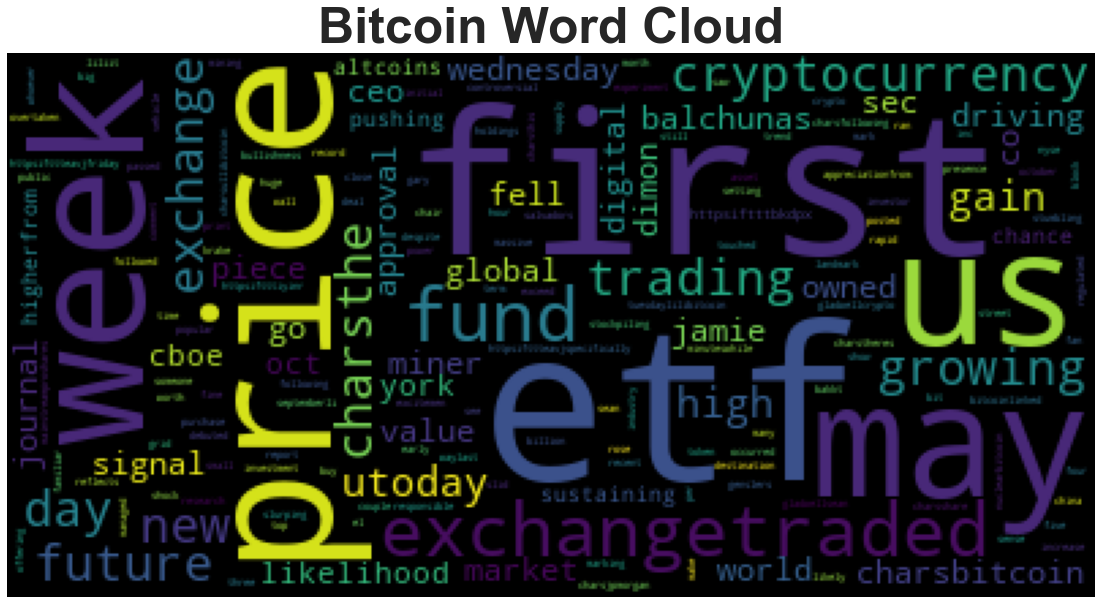

In [32]:
# Generate the Bitcoin word cloud
btc_corpus = ''
for token in btc_df.text:
    btc_corpus += token
btc_long_string = " ".join(str(elem) for elem in tokenizer(btc_corpus))
btc_wc = WordCloud(collocations=False).generate(btc_long_string)
plt.figure()
plt.title('Bitcoin Word Cloud', fontsize=50, fontweight='bold')
plt.imshow(btc_wc)
plt.axis("off")
# plt.show()

(-0.5, 399.5, 199.5, -0.5)

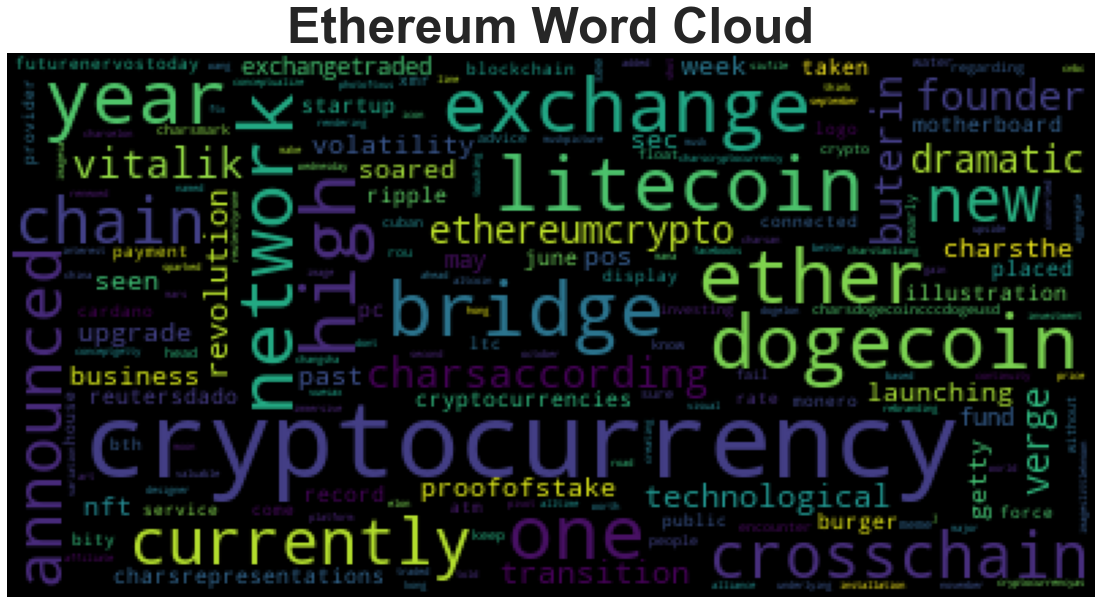

In [33]:
# Generate the Ethereum word cloud
eth_corpus = ''
for token in eth_df.text:
    eth_corpus += token
eth_wc_string = " ".join(str(elem) for elem in tokenizer(eth_corpus))
eth_wc = WordCloud(collocations=False).generate(eth_wc_string)
plt.figure()
plt.title('Ethereum Word Cloud', fontsize=50, fontweight='bold')
plt.imshow(eth_wc)
plt.axis("off")
# plt.show()

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [34]:
import spacy
from spacy import displacy

In [35]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [36]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [37]:
# Concatenate all of the Bitcoin text together
btc_corpus

'How high are the chances of Bitcoin sustaining its gains and pushing altcoins higher?from U.Today https://ift.tt/3BkD5px https://ift.tt/eA8V8JSpecifically, why did someone make a massive purchase of $1.6 billion worth of bitcoin on Wednesday in a couple of minutes?\r\nWhile many see this huge buy as a signal of bullishness, there may be more… [+8443 chars]Following SEC Chair Gary Gensler\'s landmark approval, the first bitcoin-linked BTC exchange-traded fund (ETF) debuted on the NYSE this week, driving this controversial digital asset to record highs.\r… [+2757 chars]<ul><li>Bitcoin, in terms of market value, rose 4.6% to $53,859.6.</li><li>It passed $50,000 mark for first time in four weeks on Tuesday.\xa0</li><li>Bitcoin fell below $50,000 in early September.</li>… [+821 chars]Bitcoin. Sean Gladwell\r\nSean Gladwell\r\nCrypto miners are stockpiling bitcoin, driving a supply shock and setting the world\'s most popular cryptocurrency up for further gains. \r\nIn a report from Krake… [

In [38]:
# Run the NER processor on all of the text
btc_ner = nlp(btc_corpus)

# Add a title to the document
btc_ner.user_data['title'] = 'Bitcoin NER'


In [39]:
## Access the tagged entities with .text and .label_
# for ent in btc_doc.ents:        ## For each entity in the list of entity types found in btc_doc
#     print(ent.text, ent.label_) ## print the entity's text and its label

In [40]:
# Render the visualization
displacy.render(btc_ner, style='ent')

In [41]:
# List all Entities
# for ent in btc_ner.ents:      # for-loop
#     print (ent.text, ent.label_)
# [print(ent.text, ent.label_) for ent in btc_ner.ents]     # list comprehension with print()
[[ent.text, ent.label_] for ent in btc_ner.ents]        # list comprehension

[['$1.6 billion', 'MONEY'],
 ['Wednesday', 'DATE'],
 ['a couple of minutes', 'TIME'],
 ['SEC', 'ORG'],
 ["Gary Gensler's", 'PERSON'],
 ['first', 'ORDINAL'],
 ['NYSE', 'ORG'],
 ['this week', 'DATE'],
 ['4.6%', 'PERCENT'],
 ['53,859.6.</li><li', 'MONEY'],
 ['50,000', 'MONEY'],
 ['first', 'ORDINAL'],
 ['four weeks', 'DATE'],
 ['Tuesday', 'DATE'],
 ['50,000', 'MONEY'],
 ['Sean Gladwell', 'PERSON'],
 ['Sean Gladwell', 'PERSON'],
 ['Crypto', 'PERSON'],
 ['Wednesday', 'DATE'],
 ['55,000', 'MONEY'],
 ['five months', 'DATE'],
 ['close to 10%', 'PERCENT'],
 ['just a few hours', 'TIME'],
 ['chars]JPMorgan', 'ORG'],
 ['Jamie Dimon', 'PERSON'],
 ['https://ift.tt/3iyi5nR', 'TIME'],
 ['https://ift.tt/eA8V8JFriday, October 16', 'DATE'],
 ['first', 'ORDINAL'],
 ['U.S.', 'GPE'],
 ['ProShares', 'PERSON'],
 ['first', 'ORDINAL'],
 ["El Salvador's", 'GPE'],
 ['11%', 'PERCENT'],
 ['the first day', 'DATE'],
 ['the days', 'DATE'],
 ['Bit', 'PERSON'],
 ['U.S.', 'GPE'],
 ['U.S.', 'GPE'],
 ['China', 'GPE'],
 ['La

In [42]:
## List 'ORG' entities
for ent in btc_ner.ents:
     if ent.label_ == 'ORG':
        print(ent.text)
# [ent.text for ent in btc_ner.ents if ent.label_ in ['ORG']]

SEC
NYSE
chars]JPMorgan
the Wall Street Journal
Journal
Bakkt Holdings Inc.
The Intercontinental Exchange
SEC
JPMorgan
the New York Stock Exchange
ETF
the Securities and Exchange Co
Bitcoin Futures ETF
Bitcoin
Bloomberg
the National Bureau
Board Options Exchange
CBOE
REUTERS
Reuters
REUTERS
Dado Ruvic/IllustrationSYDNEY


---

### Ethereum NER

In [43]:
# Concatenate all of the Ethereum text together
eth_corpus

"A new cross-chain bridge is currently connected to Ethereum through a cross-chain bridge, with Cardano and other public chains to come in the future.\r\nNervos\xa0today announced that the Force Bridge is … [+3114 chars]According to founder Vitalik Buterin, the Ethereum\xa0(CRYPTO: ETH) network is on the verge of a dramatic technological revolution. One year from now, Ethereum will transition into a proof-of-stake (PoS… [+372 chars]The exchange rates and logos of Bitcoin (BTH), Ether (ETH), Litecoin (LTC) and Monero (XMR) are seen on the display of a cryptocurrency ATM of blockchain payment service provider Bity at the House of… [+1120 chars]Dogecoin\xa0(CCC:DOGE-USD\r\n) sure knows how to keep its head above water. The meme crypto has seen nearly all there is to see regarding volatility, and it floats on without fail when it encounters a rou… [+2070 chars]Mark Cuban has some advice for people who are new to investing in cryptocurrency.\r\nAs an investment, I think ethereum has the mos

In [44]:
# Run the NER processor on all of the text
eth_ner = nlp(eth_corpus)

# Add a title to the document
eth_ner.user_data['title'] = 'Ethereum NER'

In [45]:
## Access the tagged entities with .text and .label_
for ent in eth_ner.ents:
    print(ent.text, ent.label_)

Ethereum PERSON
Cardano PERSON
Nervos  PERSON
today DATE
the Force Bridge FAC
Vitalik Buterin PERSON
One year from now DATE
Ethereum PERSON
Bitcoin (BTH ORG
Monero PERSON
XMR ORG
ATM ORG
Bity PERSON
House ORG
CCC ORG
DOGE-USD
 ORG
Cuban NORP
CNBC ORG
Wednesday DATE
second ORDINAL
Wang ORG
Changsha GPE
China GPE
100 CARDINAL
Ethereum PERSON
Musk PERSON
Getty Images ORG
Elon Musk PERSON
3,780% PERCENT
October DATE
Dogelon Mars PRODUCT
0.00000229 MONEY
November 1 DATE
0.0 MONEY
Getty Images ORG
the past week DATE
Hong Kong GPE
September 30, 2021 DATE
FTX ORG
NFT ORG
Robert Nickelsberg PERSON
Getty Images ORG
Coinbase Global PERSON
NFT ORG
the end of the year DATE
US GPE
Vitalik Buterin PERSON
One year from now DATE
Ethereum PERSON
a tough month DATE
Yahoo Finance ORG
the past year DATE
830% PERCENT
sec ORG
Ethereum GPE
NurPhoto PERSON
first ORDINAL
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/Illustration/File Photo MU ORG
Burger King ORG
Robinhood GPE
Bitcoin , Ethereum and Dogecoin ORG
Roy

In [46]:
# Render the visualization
displacy.render(eth_ner, style='ent')

In [47]:
# List all Entities
[ent.text for ent in eth_ner.ents]

['Ethereum',
 'Cardano',
 'Nervos\xa0',
 'today',
 'the Force Bridge',
 'Vitalik Buterin',
 'One year from now',
 'Ethereum',
 'Bitcoin (BTH',
 'Monero',
 'XMR',
 'ATM',
 'Bity',
 'House',
 'CCC',
 'DOGE-USD\r\n',
 'Cuban',
 'CNBC',
 'Wednesday',
 'second',
 'Wang',
 'Changsha',
 'China',
 '100',
 'Ethereum',
 'Musk',
 'Getty Images',
 'Elon Musk',
 '3,780%',
 'October',
 'Dogelon Mars',
 '0.00000229',
 'November 1',
 '0.0',
 'Getty Images',
 'the past week',
 'Hong Kong',
 'September 30, 2021',
 'FTX',
 'NFT',
 'Robert Nickelsberg',
 'Getty Images',
 'Coinbase Global',
 'NFT',
 'the end of the year',
 'US',
 'Vitalik Buterin',
 'One year from now',
 'Ethereum',
 'a tough month',
 'Yahoo Finance',
 'the past year',
 '830%',
 'sec',
 'Ethereum',
 'NurPhoto',
 'first',
 'June 29, 2021',
 'REUTERS',
 'Dado Ruvic/Illustration/File Photo MU',
 'Burger King',
 'Robinhood',
 'Bitcoin , Ethereum and Dogecoin',
 'Royal Perks',
 '5',
 'June 29, 2021',
 'REUTERS',
 'Dado Ruvic',
 'Oct',
 'second'

---

In [48]:
## List 'ORG' entities
[ent.text for ent in eth_ner.ents if ent.label_ in ['ORG']]

['Bitcoin (BTH',
 'XMR',
 'ATM',
 'House',
 'CCC',
 'DOGE-USD\r\n',
 'CNBC',
 'Wang',
 'Getty Images',
 'Getty Images',
 'FTX',
 'NFT',
 'Getty Images',
 'NFT',
 'Yahoo Finance',
 'sec',
 'REUTERS',
 'Dado Ruvic/Illustration/File Photo MU',
 'Burger King',
 'Bitcoin , Ethereum and Dogecoin',
 'Royal Perks',
 'REUTERS',
 'Bitcoin’s',
 'SEC',
 'NYSE']